## Remove old Weaviate DB files

!rm -rf ~/.local/share/weaviate

# Approximate Nearest Neighbors

In [1]:
from random import random, randint
from math import floor, log
import networkx as nx
import numpy as np
import matplotlib as mtplt
from matplotlib import pyplot as plt
from utils import *

vec_num = 40 # Number of vectors (nodes)
dim = 2 ## Dimention. Set to be 2. All the graph plots are for dim 2. If changed, then plots should be commented. 
m_nearest_neighbor = 2 # M Nearest Neigbor used in construction of the Navigable Small World (NSW)

vec_pos = np.random.uniform(size=(vec_num, dim))

### Query Vector

In [2]:
## Query
query_vec = [0.5, 0.5]

nodes = []
nodes.append(("Q",{"pos": query_vec}))

G_query = nx.Graph()
G_query.add_nodes_from(nodes)

print("nodes = ", nodes, flush=True)

pos_query=nx.get_node_attributes(G_query,'pos')

nodes =  [('Q', {'pos': [0.5, 0.5]})]


## Brute Force

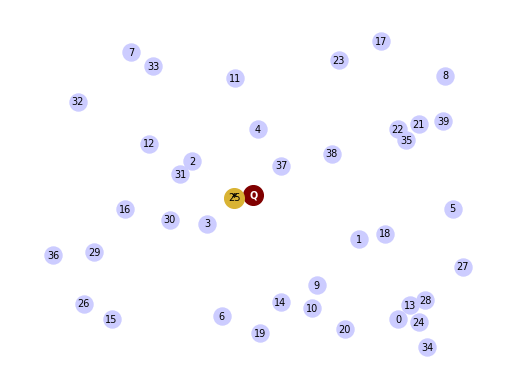

In [3]:
(G_lin, G_best) = nearest_neigbor(vec_pos,query_vec)

pos_lin=nx.get_node_attributes(G_lin,'pos')
pos_best=nx.get_node_attributes(G_best,'pos')

fig, axs = plt.subplots()

nx.draw(G_lin, pos_lin, with_labels=True, node_size=150, node_color=[[0.8,0.8,1]], width=0.0, font_size=7, ax = axs)
nx.draw(G_query, pos_query, with_labels=True, node_size=200, node_color=[[0.5,0,0]], font_color='white', width=0.5, font_size=7, font_weight='bold', ax = axs)
nx.draw(G_best, pos_best, with_labels=True, node_size=200, node_color=[[0.85,0.7,0.2]], width=0.5, font_size=7, font_weight='bold', ax = axs)

### HNSW Construction

layer_i =  3


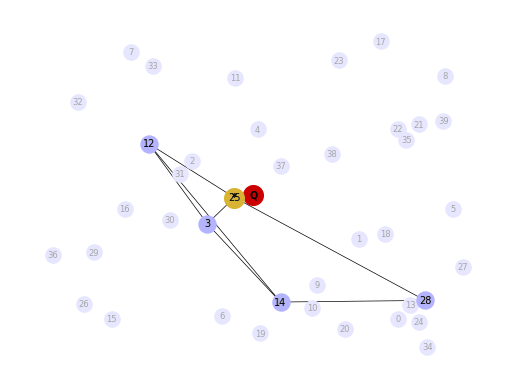

layer_i =  2


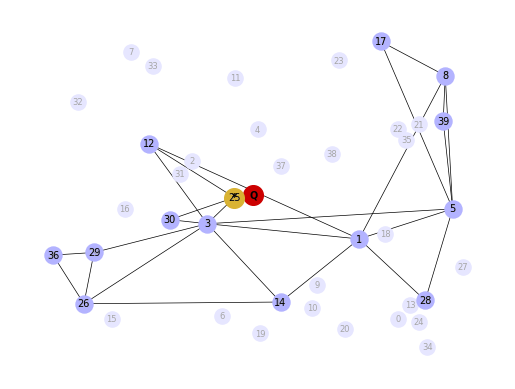

layer_i =  1


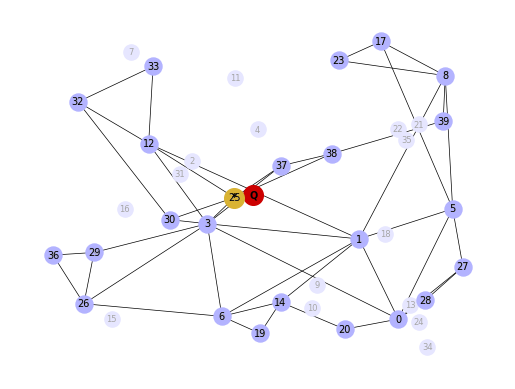

layer_i =  0


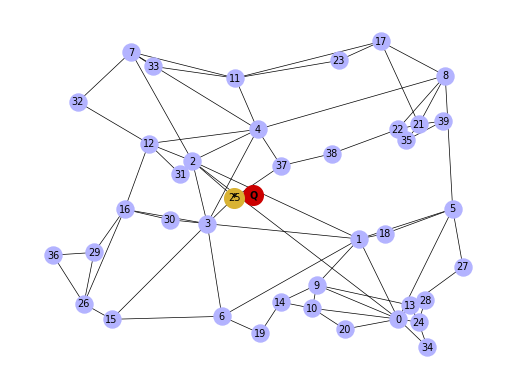

In [4]:
GraphArray = construct_HNSW(vec_pos,m_nearest_neighbor)

for layer_i in range(len(GraphArray)-1,-1,-1):
    fig, axs = plt.subplots()

    print("layer_i = ", layer_i)
        
    if layer_i>0:
        pos_layer_0 = nx.get_node_attributes(GraphArray[0],'pos')
        nx.draw(GraphArray[0], pos_layer_0, with_labels=True, node_size=120, node_color=[[0.9,0.9,1]], width=0.0, font_size=6, font_color=(0.65,0.65,0.65), ax = axs)

    pos_layer_i = nx.get_node_attributes(GraphArray[layer_i],'pos')
    nx.draw(GraphArray[layer_i], pos_layer_i, with_labels=True, node_size=150, node_color=[[0.7,0.7,1]], width=0.5, font_size=7, ax = axs)
    nx.draw(G_query, pos_query, with_labels=True, node_size=200, node_color=[[0.8,0,0]], width=0.5, font_size=7, font_weight='bold', ax = axs)
    nx.draw(G_best, pos_best, with_labels=True, node_size=200, node_color=[[0.85,0.7,0.2]], width=0.5, font_size=7, font_weight='bold', ax = axs)
    plt.show()

### HNSW Search

layer_i =  3


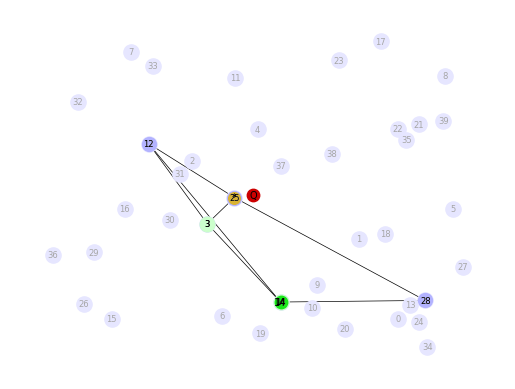

layer_i =  2


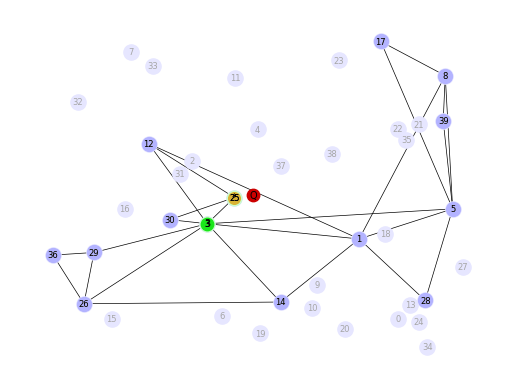

layer_i =  1


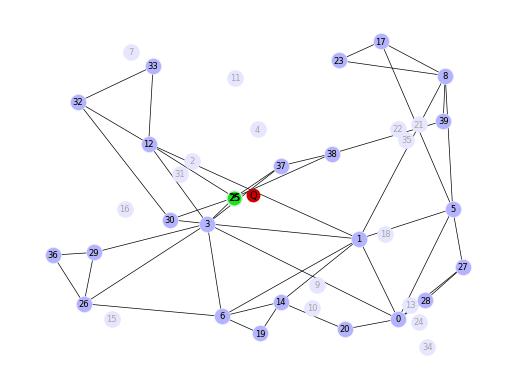

layer_i =  0


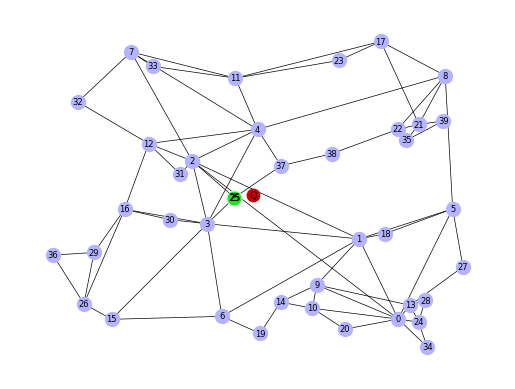

In [5]:
(SearchPathGraphArray, EntryGraphArray) = search_HNSW(GraphArray,G_query)

for layer_i in range(len(GraphArray)-1,-1,-1):
    fig, axs = plt.subplots()

    print("layer_i = ", layer_i)
    G_path_layer = SearchPathGraphArray[layer_i]
    pos_path = nx.get_node_attributes(G_path_layer,'pos')
    G_entry = EntryGraphArray[layer_i]
    pos_entry = nx.get_node_attributes(G_entry,'pos')

    if layer_i>0:
            pos_layer_0 = nx.get_node_attributes(GraphArray[0],'pos')
            nx.draw(GraphArray[0], pos_layer_0, with_labels=True, node_size=120, node_color=[[0.9,0.9,1]], width=0.0, font_size=6, font_color=(0.65,0.65,0.65), ax = axs)

    pos_layer_i = nx.get_node_attributes(GraphArray[layer_i],'pos')
    nx.draw(GraphArray[layer_i], pos_layer_i, with_labels=True, node_size=100, node_color=[[0.7,0.7,1]], width=0.5, font_size=6, ax = axs)
    nx.draw(G_path_layer, pos_path, with_labels=True, node_size=110, node_color=[[0.8,1,0.8]], width=0.5, font_size=6, ax = axs)
    nx.draw(G_query, pos_query, with_labels=True, node_size=80, node_color=[[0.8,0,0]], width=0.5, font_size=7, ax = axs)
    nx.draw(G_best, pos_best, with_labels=True, node_size=70, node_color=[[0.85,0.7,0.2]], width=0.5, font_size=7, ax = axs)
    nx.draw(G_entry, pos_entry, with_labels=True, node_size=80, node_color=[[0.1,0.9,0.1]], width=0.5, font_size=7, ax = axs)
    plt.show()

## Pure Vector Search - with a vector database

Both weaviate and weaviate-client are not supported on Windows. Good luck!

Soon everything (including courses 1, 2 and 3) will be rerun on Linux with suitable env_info and requirements.txt

### Import the Data

### Query Weaviate: Vector Search (vector embeddings)

### Vector Search with filters

### nearObject Example